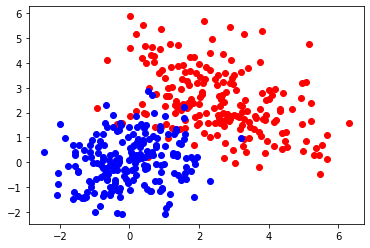

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
import math



N=200
xgauss1=[rd.gauss(0,1) for i in range(N)] 
xgauss2=[rd.gauss(0,1) for i in range(N)]



murouge=[2.5,2.5]
sigmarouge=[[2,-0.8],[-0.8,2]]
xr,yr = np.random.multivariate_normal(murouge,sigmarouge,200).T 

mublue=[0,0]
sigmablue=[[1,0],[0,1]]
xb,yb = np.random.multivariate_normal(mublue,sigmablue,200).T 

plt.plot(xr,yr,'o',c='r')
plt.plot(xb,yb,'o',c='b')

In [2]:
print([stat.mean(xr),stat.mean(yr)])
print(np.corrcoef(xr,yr))

[2.546753916636426, 2.4437667857656]
[[ 1.         -0.41011415]
 [-0.41011415  1.        ]]


In [3]:
print([stat.mean(xb),stat.mean(yb)])
print(np.corrcoef(xb,yb))

[0.007396945870690355, 0.049116446198453984]
[[1.         0.17362761]
 [0.17362761 1.        ]]


Text(0, 0.5, 'x2')

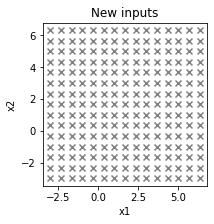

In [4]:
x1=np.linspace(-3,7,15)
x2=np.linspace(-3,7,15)
x1_min, x1_max = min(x1), max(x1)
x2_min, x2_max = min(x2), max(x2)
Neval=15; h1= (x1_max-x1_min)/Neval; h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval= np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2));
figure = plt.figure(figsize=(10,3));
ax = plt.subplot(1,3,1) 
ax.scatter(x1Eval,x2Eval,c='gray',marker='x') 
ax.set_title('New inputs')
ax.set_xlabel('x1') 
ax.set_ylabel('x2')

[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


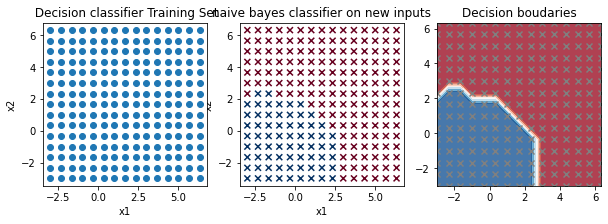

In [32]:
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,2)
X1=np.ravel(x1Eval)
Y1=np.ravel(x2Eval)
XX=np.zeros([225,2])
#Y1.shape
#XX.shape
XX[:,0]=X1
XX[:,1]=Y1
predXXclass=gnbfit.predict(XX)
print(predXXclass)
cm = plt.cm.RdBu
ax.scatter(X1,Y1,c=predXXclass,marker='x',cmap=cm)
ax.set_title('naive bayes classifier on new inputs')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax = plt.subplot(1,3,1)
ax.scatter(XX[:,0],XX[:,1],cmap=cm)
ax.set_title(' Decision classifier Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('Decision boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [33]:
# calculate priors
priory0 = len(xb) / (len(xb)+len(xr))
priory1 = len(xr) / (len(xb)+len(xr))
print(priory0, priory1)

0.5 0.5


In [6]:
#L
import scipy.stats
murouge=([stat.mean(xr),stat.mean(yr)])
matcor_rouge1=stat.variance(xr)
matcor_rouge2=stat.variance(yr)



mubleu=([stat.mean(xb),stat.mean(yb)])
matcor_bleu1=stat.variance(xb)
matcor_bleu2=stat.variance(yb)


L_rouge=scipy.stats.norm.pdf(murouge[0],matcor_rouge1)*scipy.stats.norm.pdf(murouge[1],matcor_rouge2)

L_bleu=scipy.stats.norm.pdf(mubleu[0],matcor_bleu1)*scipy.stats.norm.pdf(mubleu[1],matcor_bleu2)

print(L_rouge,L_bleu)



0.10978534307587447 0.06139424600365099


In [7]:
#the posterior probability of each observation
xr_posterior=[scipy.stats.norm.pdf(x,murouge[0],matcor_rouge1) for x in xr]
yr_posterior=[scipy.stats.norm.pdf(x,murouge[0],matcor_rouge1) for x in yr]
xb_posterior=[scipy.stats.norm.pdf(x,mubleu[0],matcor_bleu1) for x in xb]
yb_posterior=[scipy.stats.norm.pdf(x,mubleu[0],matcor_bleu1) for x in yb]

Rouge_posteriori=[xr_posterior[i]*yr_posterior[i]*(1/3) for i in range(100)]
Bleu_posteriori=[xb_posterior[i]*yb_posterior[i]*(2/3) for i in range(200)]


In [34]:
#MAP
L_rouge2=np.dot(L_rouge,Rouge_posteriori)
L_bleu2=np.dot(L_bleu,Bleu_posteriori)

print(L_rouge2)

[0.00060271 0.00046698 0.00076721 0.00093104 0.00118187 0.0010816
 0.00125348 0.00120447 0.00120703 0.00114649 0.00107008 0.00120225
 0.00113314 0.00076593 0.00101162 0.00105181 0.00109228 0.00058139
 0.00034944 0.00097575 0.00065577 0.00034929 0.00112201 0.00101095
 0.0011872  0.00109173 0.00113432 0.00127531 0.00095141 0.00032694
 0.00122937 0.00111473 0.00089845 0.00089066 0.00065628 0.00126356
 0.00119014 0.00088562 0.00127473 0.00107231 0.00069426 0.00060379
 0.00086934 0.00101579 0.00047539 0.001003   0.00079814 0.00116361
 0.0004533  0.0006914  0.00106498 0.00130775 0.0010339  0.00049793
 0.00120807 0.00101394 0.0012067  0.00090594 0.00024263 0.00048735
 0.00068378 0.00130806 0.00110791 0.00103752 0.00072791 0.00126772
 0.001228   0.00123542 0.00092409 0.00098721 0.00091404 0.00083698
 0.00068171 0.00113319 0.00106153 0.00040954 0.00060774 0.00127698
 0.00090995 0.00101916 0.00093288 0.00129395 0.00131309 0.00123207
 0.00109954 0.00049805 0.00104528 0.00056606 0.00090661 0.00063

In [35]:
np.dot(0.2,[3,4,5])

array([0.6, 0.8, 1. ])

In [36]:
from sklearn.naive_bayes import GaussianNB
#initial data set: X (inputs), y (output).
X=[[xr[i],yr[i]] for i in range(200)]
X2=[[xb[i],yb[i]] for i in range(200)]
for i in range(200):
    X.append(X2[i])
y=[0 for i in range(200)]
for i in range(200):
    y.append(1)
print(len(y))
print(len(X))
gnb=GaussianNB();
gnbfit=gnb.fit(X, y);
y_pred=gnbfit.predict(X)
y_pred

400
400


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [37]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))## Accuracy: 0.9033333333333333

Accuracy: 0.9525


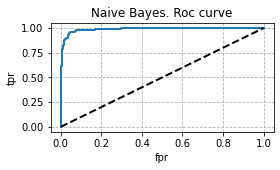

In [38]:
y_proba=gnbfit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

In [39]:
auc=metrics.roc_auc_score(y, y_proba);
print(auc)

0.989525


In [40]:
#initial data set: X (inputs), y (output).
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/3, random_state=0)
gnb=GaussianNB();
gnbfit=gnb.fit(X_train, y_train);
y_pred=gnbfit.predict(X_test)
E_test=(y_test!=y_pred).sum()/len(y_test)
print("Error on the test data set %5.2f->",E_test)

Error on the test data set %5.2f-> 0.03731343283582089


In [41]:
from sklearn.model_selection import KFold
X=[[xr[i],yr[i]] for i in range(200)]
X2=[[xb[i],yb[i]] for i in range(200)]
for i in range(200):
    X.append(X2[i])
y=[0 for i in range(200)]
for i in range(200):
    y.append(1)
    
KFold(n_splits=5)

KFold(n_splits=5, random_state=None, shuffle=False)

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2);

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis();

In [44]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(C=1e5);

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5);

>1 mean=0.9500 se=0.011
>2 mean=0.9488 se=0.009
>3 mean=0.9500 se=0.006
>4 mean=0.9506 se=0.005
>5 mean=0.9505 se=0.005
>6 mean=0.9508 se=0.004
>7 mean=0.9504 se=0.004
>8 mean=0.9503 se=0.003
>9 mean=0.9506 se=0.003
>10 mean=0.9507 se=0.003
>11 mean=0.9509 se=0.003
>12 mean=0.9510 se=0.003
>13 mean=0.9512 se=0.003
>14 mean=0.9513 se=0.003
>15 mean=0.9513 se=0.003


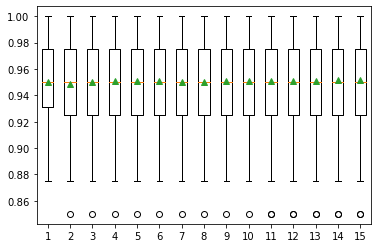

In [46]:
#compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = GaussianNB()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()